In [1]:
import mytry
from utils import evaluate as my_eval
from utils import model_MLP as my_MLP

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [2]:
EPOCH = 3000

In [3]:
filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"

# Raw
x_train, y_train, x_test, y_test, scaler_raw = mytry.get_traintest(
    filepath=filepath,
    pred_category='편의점', 
    y_next_quarter=True, 
    random_split=True, 
    norm=None, 
    pca=False
)

# MinMMax
scaler_minmax = MinMaxScaler()
x_train_minmax, x_test_minmax = mytry.__get_normed(x_train, x_test, scaler_minmax)
y_train_minmax, y_test_minmax = mytry.__get_normed(y_train, y_test, scaler_minmax)

# Standard
scaler_std = StandardScaler()
x_train_std, x_test_std = mytry.__get_normed(x_train, x_test, scaler_std)
y_train_std, y_test_std = mytry.__get_normed(y_train, y_test, scaler_std)

# PCA
scaler_pca = StandardScaler()
pca = PCA()
x_train_pca, x_test_pca = mytry.__get_normed(x_train, x_test, scaler_pca)
y_train_pca, y_test_pca = mytry.__get_normed(y_train, y_test, scaler_pca)
x_train_pca, x_test_pca = mytry.___get_PCA(x_train_pca, x_test_pca, pca)

[train] 2017_1 : (1147, 30), accumulate : (1147, 30)
[train] 2017_2 : (1147, 30), accumulate : (2294, 30)
[train] 2017_3 : (1147, 30), accumulate : (3441, 30)
[train] 2017_4 : (1147, 30), accumulate : (4588, 30)
[train] 2018_1 : (1147, 30), accumulate : (5735, 30)
[train] 2018_2 : (1147, 30), accumulate : (6882, 30)
[train] 2018_3 : (1147, 30), accumulate : (8029, 30)
[test] 2019_1 : (1147, 30), accumulate : (1147, 30)
[test] 2019_2 : (1147, 30), accumulate : (2294, 30)
[test] 2019_3 : (1147, 30), accumulate : (3441, 30)
[test] 2018_4 : (1147, 30), accumulate : (4588, 30)
x_header ['남성연령대_10_유동인_수', '남성연령대_20_유동인_수', '남성연령대_30_유동인_수', '남성연령대_40_유동인_수', '남성연령대_50_유동인_수', '남성연령대_60_유동인_수', '여성연령대_10_유동인_수', '여성연령대_20_유동인_수', '여성연령대_30_유동인_수', '여성연령대_40_유동인_수', '여성연령대_50_유동인_수', '여성연령대_60_유동인_수'] y_header ['다음분기_매출_금액']
random split
pca ratios [0.78 0.11 0.07 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca ratios [0.78 0.11 0.07 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca top-3


In [4]:
print(x_train[0])
print(x_train_minmax[0])
print(x_train_std[0])
print(x_train_pca[0])

[ 240987 1093190  337325  208990  155134  174625  282394 1341711  300905
  190892  194157  276297]
[0.64739858 0.6388034  0.29341539 0.23251226 0.30457788 0.25972761
 0.49099533 0.60365918 0.31338134 0.31066729 0.37387063 0.46504312]
[ 7.74618925 12.06406675  4.83856372  3.80962857  3.86824996  3.75355166
  8.5296881  11.86299837  5.15111477  4.41459199  4.78463825  4.6229197 ]
[21.02665764  5.14008499  9.9314108 ]


In [5]:
dataset_raw =    [x_train, y_train, x_test, y_test]
dataset_minmax = [x_train_minmax, y_train_minmax, x_test_minmax, y_test_minmax]
dataset_std =    [x_train_std, y_train_std, x_test_std, y_test_std]
dataset_pca =    [x_train_pca, y_train_pca, x_test_pca, y_test_pca]

# Model training

## LGBM

In [6]:
model_LGBM_raw = mytry.main(
    modelname='LGBM_raw',
    datasets = dataset_raw,
    scaler = scaler_raw
)

------- evaluate LGBM with raw -------
RMSE : 907318835.029935
R2 : 0.647033
----------------------------
[398639.21074334] 3786
평균 오차 105%
최대 오차 2973%
최소 오차 0%


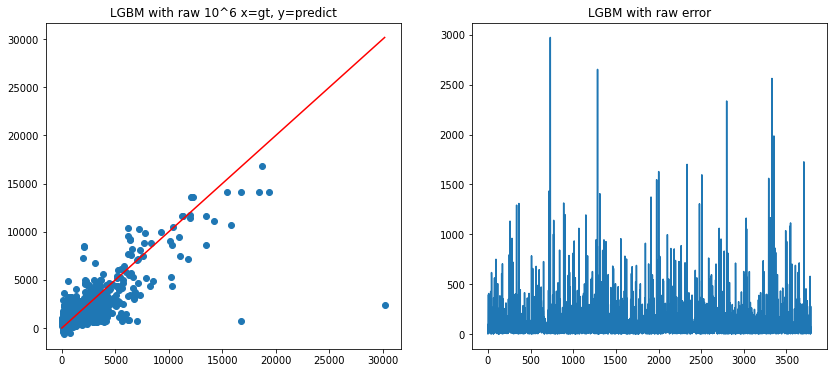

In [7]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, model_name='LGBM with raw')

In [8]:
model_LGBM_minmax = mytry.main(
    modelname='LGBM_minmax',
    datasets = dataset_minmax,
    scaler = scaler_minmax
)

In [9]:
model_LGBM_std = mytry.main(
    modelname='LGBM_std',
    datasets = dataset_std,
    scaler = scaler_std
)

In [10]:
model_LGBM_pca = mytry.main(
    modelname='LGBM_pca',
    datasets = dataset_pca,
    scaler = scaler_pca
)

## 4-MLP [12, 6, 1]

In [ ]:
model_4MLP_raw, hist_4MLP_raw = mytry.main(
    modelname='4-MLP_raw',
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=2,
    epoch=EPOCH
)

.

In [ ]:
model_4MLP_minmax, hist_4MLP_minmax = mytry.main(
    modelname='4-MLP_minmax',
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=2,
    epoch=EPOCH
)

In [ ]:
model_4MLP_std, hist_4MLP_std = mytry.main(
    modelname='4-MLP_std',
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=2,
    epoch=EPOCH
)

In [ ]:
model_4MLP_pca, hist_4MLP_pca = mytry.main(
    modelname='4-MLP_pca',
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=2,
    epoch=EPOCH
)

## 5-MLP [24, 12, 6, 1]

In [ ]:
model_5MLP_raw, hist_5MLP_raw = mytry.main(
    modelname='5-MLP_raw',
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=3,
    epoch = EPOCH
)

In [ ]:
model_5MLP_minmax, hist_5MLP_minmax = mytry.main(
    modelname='5-MLP_minmax',
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=3,
    epoch = EPOCH
)

In [ ]:
model_5MLP_std, hist_5MLP_std = mytry.main(
    modelname='5-MLP_std',
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=3,
    epoch = EPOCH
)

In [ ]:
model_5MLP_pca, hist_5MLP_pca = mytry.main(
    modelname='5-MLP_pca',
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=3,
    epoch = EPOCH
)

# Evaluate

## LGBM

In [ ]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, model_name='LGBM with raw')

In [ ]:
errs_LGBM_minmax = my_eval.eval_regression(y_test_minmax, model_LGBM_minmax.predict(x_test_minmax), scaler=scaler_minmax, model_name='LGBM with minmax norm')

In [ ]:
errs_LGBM_std = my_eval.eval_regression(y_test_std, model_LGBM_std.predict(x_test_std), scaler=scaler_std, model_name='LGBM with std norm')

In [ ]:
errs_LGBM_pca = my_eval.eval_regression(y_test_pca, model_LGBM_pca.predict(x_test_pca), scaler=scaler_pca, model_name='LGBM with PCA')

## 4-MLP

In [ ]:
errs_4MLP_raw = my_eval.eval_regression(y_test, model_4MLP_raw.predict(x_test), scaler=scaler_raw, model_name='4-MLP with raw')

In [ ]:
errs_4MLP_minmax = my_eval.eval_regression(y_test_minmax, model_4MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, model_name='4-MLP with minmax norm')

In [ ]:
errs_4MLP_std = my_eval.eval_regression(y_test_std, model_4MLP_std.predict(x_test_std), scaler=scaler_std, model_name='4-MLP with std')

In [ ]:
errs_4MLP_pca = my_eval.eval_regression(y_test_pca, model_4MLP_pca.predict(x_test_pca), scaler=scaler_pca, model_name='4-MLP with PCA')

# 5-MLP

In [ ]:
errs_5MLP_raw = my_eval.eval_regression(y_test, model_5MLP_raw.predict(x_test), scaler=scaler_raw, model_name='4-MLP with raw')

In [ ]:
errs_5MLP_minmax = my_eval.eval_regression(y_test_minmax, model_5MLP_raw.predict(x_test_minmax), scaler=scaler_minmax, model_name='5-MLP with minmax norm')

In [ ]:
errs_5MLP_std = my_eval.eval_regression(y_test_std, model_5MLP_std.predict(x_test_std), scaler=scaler_std, model_name='5-MLP with std norm')

In [ ]:
errs_5MLP_pca = my_eval.eval_regression(y_test_pca, model_5MLP_pca.predict(x_test_pca), scaler=scaler_pca, model_name='5-MLP with PCA')

# Appendix - MLP training history

In [ ]:
my_MLP.plot_history(hist_4MLP_raw)

In [ ]:
my_MLP.plot_history(hist_4MLP_minmax)

In [ ]:
my_MLP.plot_history(hist_4MLP_std)

In [ ]:
my_MLP.plot_history(hist_4MLP_pca)

In [ ]:
my_MLP.plot_history(hist_5MLP_raw)

In [ ]:
my_MLP.plot_history(hist_5MLP_minmax)

In [ ]:
my_MLP.plot_history(hist_5MLP_std)

In [ ]:
my_MLP.plot_history(hist_5MLP_pca)